# Pre-processing of Dataset

In [1]:
import pandas as pd

# separate the dataset, using separater -- semicolon
df = pd.read_csv('HOML.csv', sep=';')

# Check the first few rows of data to confirm that the data has been correctly formatted
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [2]:
# Create a new column 'customer_for', which represents the duration of each customer's relationship in the business
# Specifically, this column indicates how many days each customer has been in business since their join date (date in the 'Dt_Customer' column).

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df["Dt_Customer"].agg(["min", "max"])


# Create a new column 'regist_month'
df["regist_month"] = df["Dt_Customer"].dt.month

# Create a new column 'regist_year'
df["regist_year"] = df["Dt_Customer"].dt.year

# Create a new column 'age'
# Calculate the user's age.
df["age"] = 2014 - df["Year_Birth"]

# Create a new column 'is_parent'
# Detect whether the user is a child
df["is_parent"] = (df[["Kidhome", "Teenhome"]].sum(axis=1) > 0).astype(int)

In [3]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,regist_month,regist_year,age,is_parent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,9,2012,57,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,3,2014,60,1
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,8,2013,49,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,3,11,0,2,2014,30,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,1,2014,33,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,3,11,0,6,2013,47,1
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,1,0,0,3,11,0,6,2014,68,1
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,0,3,11,0,1,2014,33,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,3,11,0,1,2014,58,1


In [4]:
def extract_day(date):
    day = str(date).split(" ", 1)[0]
    return pd.to_numeric(day, errors="coerce")


df["customer_for"] = df["Dt_Customer"].max() - df["Dt_Customer"]
df["customer_for"] = df["customer_for"].apply(extract_day)


df["amount_spent"] = df[
    "MntWines MntFruits MntMeatProducts MntFishProducts MntSweetProducts MntGoldProds".split()
].sum(axis=1)
df["life_time_value"] = df["amount_spent"] / ((df["customer_for"] + 1) / 365)

In [5]:
df["Living_With"] = df["Marital_Status"].replace(
    {
        "Married": "Partner",
        "Together": "Partner",
        "Absurd": "Alone",
        "Widow": "Alone",
        "YOLO": "Alone",
        "Divorced": "Alone",
        "Single": "Alone",
    }
)
df["Children"] = df[["Kidhome", "Teenhome"]].sum(axis=1)

df["Family_Size"] = (
    df["Living_With"].replace({"Alone": 1, "Partner": 2}) + df["Children"]
)

# Segmenting education levels in three groups
df["Education"] = df["Education"].replace(
    {
        "Basic": "Undergraduate",
        "2n Cycle": "Undergraduate",
        "Graduation": "Graduate",
        "Master": "Postgraduate",
        "PhD": "Postgraduate",
    }
)

# For clarity
df = df.rename(
    columns={
        "MntWines": "Wines",
        "MntFruits": "Fruits",
        "MntMeatProducts": "Meat",
        "MntFishProducts": "Fish",
        "MntSweetProducts": "Sweets",
        "MntGoldProds": "Gold",
    }
)


# Dropping some of the redundant features
to_drop = [
    "Marital_Status",
    "Dt_Customer",
    "Year_Birth",
    "ID",
   "Registration_Year",
]

df = df.drop(to_drop, axis=1, errors="ignore")

In [6]:
# Create a column name mapping dictionary to map original column names to more understandable column names
column_mapping = {
    'ID': 'Customer_ID',
    'Year_Birth': 'Birth_Year',
    'Education': 'Education_Level',
    'Marital_Status': 'Marital_Status',
    'Income': 'Income',
    'Kidhome': 'Number_of_Kids_at_Home',
    'Teenhome': 'Number_of_Teenagers_at_Home',
    'Dt_Customer': 'Customer_Registration_Date',
    'Recency': 'Recency_Score',
    'Wines': 'Spending_on_Wines',
    'Fruits': 'Spending_on_Fruits',
    'Meat': 'Spending_on_Meat',
    'Fish': 'Spending_on_Fish',
    'Sweets': 'Spending_on_Sweets',
    'Gold': 'Spending_on_Gold',
    'NumDealsPurchases': 'Number_of_Deal_Purchases',
    'NumWebPurchases': 'Number_of_Web_Purchases',
    'NumCatalogPurchases': 'Number_of_Catalog_Purchases',
    'NumStorePurchases': 'Number_of_Store_Purchases',
    'NumWebVisitsMonth': 'Number_of_Web_Visits_Per_Month',
    'AcceptedCmp3': 'Accepted_Campaign_3',
    'AcceptedCmp4': 'Accepted_Campaign_4',
    'AcceptedCmp5': 'Accepted_Campaign_5',
    'AcceptedCmp1': 'Accepted_Campaign_1',
    'AcceptedCmp2': 'Accepted_Campaign_2',
    'Complain': 'Complaint_Flag',
    'Z_CostContact': 'Cost_of_Contact',
    'Z_Revenue': 'Revenue',
    'Response': 'Response_Flag',
    'regist_month': 'Registration_Month',
    'regist_year': 'Registration_Year',
    'age': 'Age',
    'is_parent': 'Is_Parent',
    'customer_for': 'Customer_Duration',
    'amount_spent': 'Total_Amount_Spent',
    'life_time_value': 'Customer_Lifetime_Value',
    'Living_With': 'Living_With',
    'Children': 'Number_of_Children',
    'Family_Size': 'Family_Size'
}

# Use the rename method to change column names to the new names
df.rename(columns=column_mapping, inplace=True)

# Print the DataFrame after the changes
df.head()

,Education_Level,Income,Number_of_Kids_at_Home,Number_of_Teenagers_at_Home,Recency_Score,Spending_on_Wines,Spending_on_Fruits,Spending_on_Meat,Spending_on_Fish,Spending_on_Sweets,...,Registration_Month,Registration_Year,Age,Is_Parent,Customer_Duration,Total_Amount_Spent,Customer_Lifetime_Value,Living_With,Number_of_Children,Family_Size
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,9,2012,57,0,663,1617,888.862952,Alone,0,1
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,3,2014,60,1,113,27,86.447368,Alone,2,3
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,8,2013,49,0,312,776,904.920128,Partner,0,2
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,2,2014,30,1,139,53,138.178571,Partner,1,3
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,1,2014,33,1,161,422,950.802469,Partner,1,3


In [7]:
df['Number_of_Web_Visits_Per_Month']

0       7
1       5
2       4
3       6
4       5
       ..
2235    5
2236    7
2237    6
2238    3
2239    7
Name: Number_of_Web_Visits_Per_Month, Length: 2240, dtype: int64

## Fill missing values

In [8]:
# use mode to fill the missing values
mode_values = df.mode().iloc[0]

df.fillna(mode_values, inplace=True)

In [9]:

X = df

## Identify different customer subgroups: Through clustering techniques, customers are divided into different clusters to better understand their diversity and differences.

Provide targeted marketing strategies: Once customers are segmented into different clusters, specific marketing strategies can be developed based on the characteristics and needs of each cluster to meet their needs and expectations.


** Features are extracted and evaluated with a customized evaluation model, re is the most recent purchase, eng is the number of marketing campaigns received, mon is the consumption data, fre is the frequency of purchases, revenue is the income of the purchaser**

In [10]:
# use k-means to evaluate these estimate
X['Re'] = X['Recency_Score']
X['Engagement'] = X["Accepted_Campaign_1"] + X["Accepted_Campaign_2"]+X["Accepted_Campaign_3"]+X["Accepted_Campaign_4"]+X["Accepted_Campaign_5"]+X['Number_of_Web_Visits_Per_Month']
X['Mon'] =X["Spending_on_Wines"]+X['Spending_on_Fruits']+X['Spending_on_Meat']+X['Spending_on_Fish']+X['Spending_on_Sweets']+X['Spending_on_Gold']


In [11]:
X['frequency'] = X['Number_of_Deal_Purchases']+X['Number_of_Web_Purchases']+X['Number_of_Catalog_Purchases']+X['Number_of_Store_Purchases']

In [12]:
# X['loy'] = pd.DataFrame(z)
X['Revenue'] = X['Income']

In [13]:
X.columns

Index(['Education_Level', 'Income', 'Number_of_Kids_at_Home',
       'Number_of_Teenagers_at_Home', 'Recency_Score', 'Spending_on_Wines',
       'Spending_on_Fruits', 'Spending_on_Meat', 'Spending_on_Fish',
       'Spending_on_Sweets', 'Spending_on_Gold', 'Number_of_Deal_Purchases',
       'Number_of_Web_Purchases', 'Number_of_Catalog_Purchases',
       'Number_of_Store_Purchases', 'Number_of_Web_Visits_Per_Month',
       'Accepted_Campaign_3', 'Accepted_Campaign_4', 'Accepted_Campaign_5',
       'Accepted_Campaign_1', 'Accepted_Campaign_2', 'Complaint_Flag',
       'Cost_of_Contact', 'Revenue', 'Response_Flag', 'Registration_Month',
       'Registration_Year', 'Age', 'Is_Parent', 'Customer_Duration',
       'Total_Amount_Spent', 'Customer_Lifetime_Value', 'Living_With',
       'Number_of_Children', 'Family_Size', 'Re', 'Engagement', 'Mon',
       'frequency'],
      dtype='object')

In [14]:
clu = X[['Re','Engagement','Mon','frequency','Revenue']]
clu

,Re,Engagement,Mon,frequency,Revenue
0,58,7,1617,25,58138.0
1,38,5,27,6,46344.0
2,26,4,776,21,71613.0
3,26,6,53,8,26646.0
4,94,5,422,19,58293.0
...,...,...,...,...,...
2235,46,5,1341,18,61223.0
2236,56,8,444,22,64014.0
2237,91,7,1241,19,56981.0
2238,8,3,843,23,69245.0


## Data preprocessing, normalization

In [15]:
# Standardization

from sklearn.preprocessing import MinMaxScaler

# Create a StandardScaler object
scaler = MinMaxScaler()

# Standardize X using StandardScaler
change_clu=scaler.fit_transform(clu)



In [16]:
change_clu

array([[0.58585859, 0.33333333, 0.63968254, 0.56818182, 0.08483222],
       [0.38383838, 0.23809524, 0.00873016, 0.13636364, 0.06709518],
       [0.26262626, 0.19047619, 0.30595238, 0.47727273, 0.10509733],
       ...,
       [0.91919192, 0.33333333, 0.49047619, 0.43181818, 0.08309221],
       [0.08080808, 0.14285714, 0.33253968, 0.52272727, 0.10153609],
       [0.4040404 , 0.33333333, 0.06626984, 0.25      , 0.07690815]])

In [17]:
clu = pd.DataFrame(change_clu,columns=['Re','Engagement','Mon','frequency','Revenue'])
clu

,Re,Engagement,Mon,frequency,Revenue
0,0.585859,0.333333,0.639683,0.568182,0.084832
1,0.383838,0.238095,0.008730,0.136364,0.067095
2,0.262626,0.190476,0.305952,0.477273,0.105097
3,0.262626,0.285714,0.019048,0.181818,0.037471
4,0.949495,0.238095,0.165476,0.431818,0.085065
...,...,...,...,...,...
2235,0.464646,0.238095,0.530159,0.409091,0.089472
2236,0.565657,0.380952,0.174206,0.500000,0.093669
2237,0.919192,0.333333,0.490476,0.431818,0.083092
2238,0.080808,0.142857,0.332540,0.522727,0.101536


## Using kmeans clustering, the following graph shows the size of the shortened distances when divided into different clusters

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

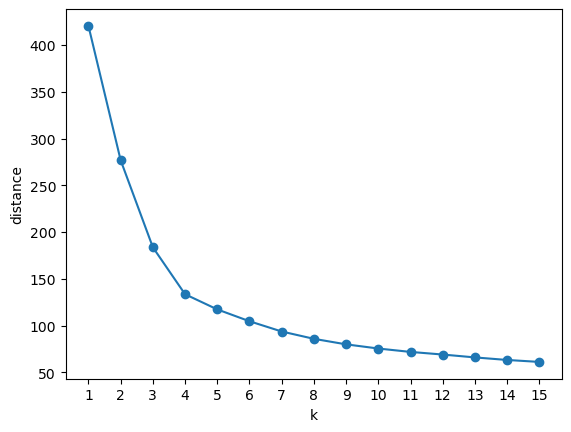

In [18]:
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
distortions = []
for i in range(1,16,1): #Here is a list of K values and centroid distances for group numbers ranging from 1 to 16
    clf = KMeans(n_clusters=i)
    s = clf.fit(clu[['Re','Engagement','Mon','frequency','Revenue']])
    distortions.append(clf.inertia_)
k = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
plt.scatter(k, distortions)
plt.plot(k, distortions)
plt.xlabel("k")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])  # Specify the number and values of tick marks on the x-axis
plt.ylabel("distance")
plt.show()

### From the graph, we see that the cluster distance is best when k=5
### So set the clusters to 5 for classification and get the cluster centers

In [19]:
from sklearn.cluster import KMeans
from sklearn import metrics
group_number=5
kmeans_model=KMeans(n_clusters = group_number)
kmeans_model.fit(clu)  
kmeans_model.cluster_centers_   

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[0.23432544, 0.22112631, 0.47899035, 0.5057704 , 0.10349421],
       [0.83352981, 0.30195053, 0.06012223, 0.21640316, 0.0545549 ],
       [0.48752786, 0.30851777, 0.06722185, 0.23143406, 0.05456168],
       [0.15668203, 0.30754883, 0.06093647, 0.21580436, 0.05693762],
       [0.74091114, 0.20792366, 0.48101182, 0.49130475, 0.10182401]])

## Categorized tags

In [20]:
kmeans_model.labels_

array([4, 2, 0, ..., 4, 0, 2], dtype=int32)

## Silhouette Coefficient##
The so-called Silhouette Coefficient, which essentially measures the ratio of the distance of each sample point to the samples in its cluster to the distance between its nearest cluster structure. If the ratio is greater, the further the distance between the cluster structure in which the sample point is located and its nearest cluster structure, thus indicating a better clustering result at that point.

In [21]:
pgjg=metrics.silhouette_score(clu, kmeans_model.labels_, metric='euclidean')
print('silhouette_score=',pgjg)

silhouette_score= 0.3203469096580186


### Plotting the center of a cluster ###

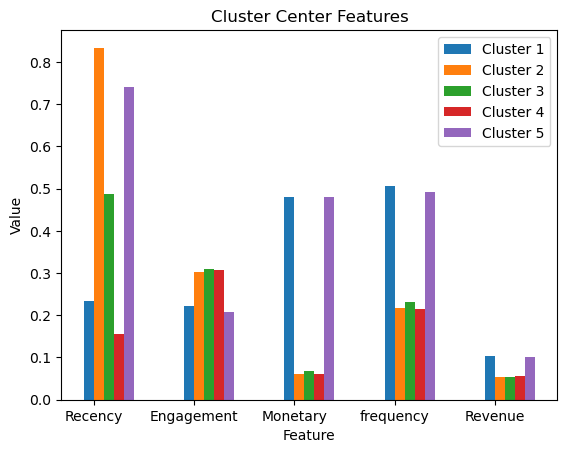

In [22]:
import numpy as np



centers = kmeans_model.cluster_centers_

# "Inverse normalize" the data to plot it on the original scale
centers_original = centers #scaler.inverse_transform(centers)

# Create bar charts for each feature of the clustering centers
# Assuming there are four features in 'centers'
n_features = centers_original.shape[1]
x = np.arange(1, n_features + 1)

# Generate a bar chart
fig, ax = plt.subplots()

for i, center in enumerate(centers_original):
    ax.bar(x + i*0.1, center, width=0.1, label=f'Cluster {i+1}')

# Add some text labels
ax.set_xlabel('Feature')
ax.set_ylabel('Value')
ax.set_title('Cluster Center Features')
ax.set_xticks(x + 0.1 / 2)
ax.set_xticklabels(['Recency','Engagement','Monetary','frequency','Revenue'])
plt.legend()
plt.show()

## The data is further processed to draw a radar map ##

In [23]:
show_label = pd.DataFrame(kmeans_model.labels_,columns=["label"])
show_chart = pd.concat([clu,show_label],axis=1)
show_chart

,Re,Engagement,Mon,frequency,Revenue,label
0,0.585859,0.333333,0.639683,0.568182,0.084832,4
1,0.383838,0.238095,0.008730,0.136364,0.067095,2
2,0.262626,0.190476,0.305952,0.477273,0.105097,0
3,0.262626,0.285714,0.019048,0.181818,0.037471,3
4,0.949495,0.238095,0.165476,0.431818,0.085065,1
...,...,...,...,...,...,...
2235,0.464646,0.238095,0.530159,0.409091,0.089472,0
2236,0.565657,0.380952,0.174206,0.500000,0.093669,2
2237,0.919192,0.333333,0.490476,0.431818,0.083092,4
2238,0.080808,0.142857,0.332540,0.522727,0.101536,0


In [24]:
kmeans_model.cluster_centers_

array([[0.23432544, 0.22112631, 0.47899035, 0.5057704 , 0.10349421],
       [0.83352981, 0.30195053, 0.06012223, 0.21640316, 0.0545549 ],
       [0.48752786, 0.30851777, 0.06722185, 0.23143406, 0.05456168],
       [0.15668203, 0.30754883, 0.06093647, 0.21580436, 0.05693762],
       [0.74091114, 0.20792366, 0.48101182, 0.49130475, 0.10182401]])

In [25]:
kmeans_model.cluster_centers_[0]

array([0.23432544, 0.22112631, 0.47899035, 0.5057704 , 0.10349421])

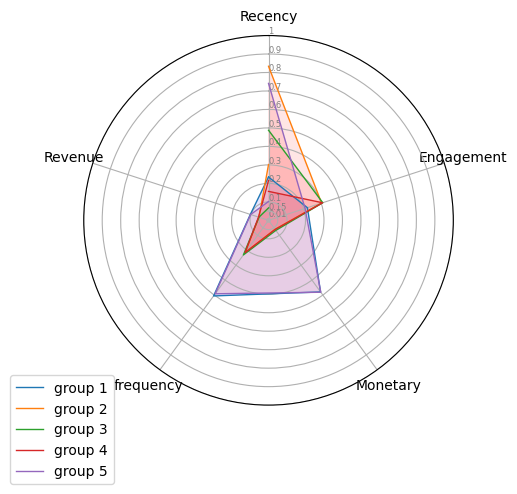

In [26]:
# ---------- Step 1

from cmath import pi


categories = list(['Recency','Engagement','Monetary','frequency','Revenue'])[:]
# Number of variable categories
N = len(categories)

# Set the angle values for each point
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)

# the first axis to be on top:
# Configure the angle offset
ax.set_theta_offset(pi / 2)
# Set clockwise or counterclockwise, 1 or -1
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.01,0.05,0.10,0.20,0.30,0.40,0.50,0.6,0.7,0.8,0.9,1], ["0.01","0.15","0.1","0.2", "0.3","0.4","0.5","0.6","0.7","0.8","0.9","1"], color="grey", size=6)
plt.ylim(0, 1)

# ---------- Step 2

# Plot each group of data separately
# Ind1
values = kmeans_model.cluster_centers_[0]
values = np.append(values, values[0])  # Close the loop
# print(values,angles)
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group 1")
ax.fill(angles, values, 'b', alpha=0.1)



# Ind2
values = kmeans_model.cluster_centers_[1]
values = np.append(values, values[1]) 
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group 2")
ax.fill(angles, values, 'r', alpha=0.1)
values = kmeans_model.cluster_centers_[2]
values = np.append(values, values[2]) 
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group 3")
ax.fill(angles, values, 'r', alpha=0.1)
values = kmeans_model.cluster_centers_[3]
values = np.append(values, values[3]) 
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group 4")
ax.fill(angles, values, 'r', alpha=0.1)
values = kmeans_model.cluster_centers_[4]
values = np.append(values, values[4]) 
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group 5")
ax.fill(angles, values, 'r', alpha=0.1)
# values = kmeans_model.cluster_centers_[5]
# ax.plot(angles, values, linewidth=1, linestyle='solid', label="group F")
# ax.fill(angles, values, 'r', alpha=0.1)
# values = kmeans_model.cluster_centers_[1]
# ax.plot(angles, values, linewidth=1, linestyle='solid', label="group G")
# ax.fill(angles, values, 'r', alpha=0.1)


# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))



## The following eliminates some of the noisy data and improves the clustering results

In [27]:
clu

,Re,Engagement,Mon,frequency,Revenue
0,0.585859,0.333333,0.639683,0.568182,0.084832
1,0.383838,0.238095,0.008730,0.136364,0.067095
2,0.262626,0.190476,0.305952,0.477273,0.105097
3,0.262626,0.285714,0.019048,0.181818,0.037471
4,0.949495,0.238095,0.165476,0.431818,0.085065
...,...,...,...,...,...
2235,0.464646,0.238095,0.530159,0.409091,0.089472
2236,0.565657,0.380952,0.174206,0.500000,0.093669
2237,0.919192,0.333333,0.490476,0.431818,0.083092
2238,0.080808,0.142857,0.332540,0.522727,0.101536


In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)

clu_reduced = pca.fit_transform(clu)

In [29]:
clu_reduced

array([[ 0.20001585,  0.40554121,  0.11016578],
       [-0.18292486, -0.25437845, -0.09213127],
       [-0.18811966,  0.20131766, -0.00808327],
       ...,
       [ 0.47208682,  0.13017024,  0.06750822],
       [-0.3497586 ,  0.30014995, -0.03063077],
       [-0.14069077, -0.16887912,  0.03666503]])

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

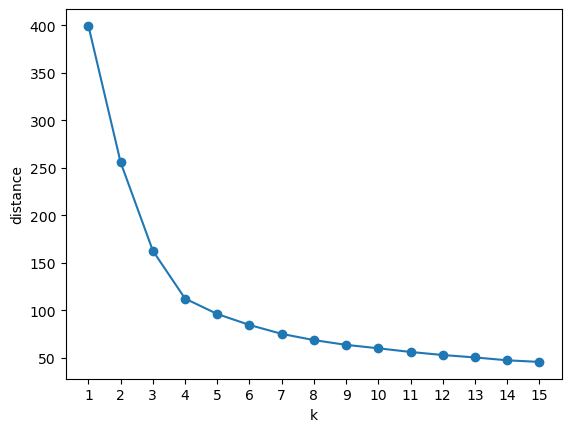

In [30]:
from sklearn.cluster import KMeans
distortions = []
for i in range(1,16,1): #Here is a list of K values and centroid distances for group numbers ranging from 1 to 16
    clf = KMeans(n_clusters=i)
    s = clf.fit(clu_reduced)
    distortions.append(clf.inertia_)
k = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
plt.scatter(k, distortions)
plt.plot(k, distortions)
plt.xlabel("k")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])  # Specify the number and values of tick marks on the x-axis
plt.ylabel("distance")
plt.show()

## After PCA downscaling, we find that clusters of 3-4 are better

In [31]:
from sklearn.cluster import KMeans
from sklearn import metrics
group_number=4
kmeans_model=KMeans(n_clusters = group_number)
kmeans_model.fit(clu_reduced)  
kmeans_model.cluster_centers_   

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[ 0.31131708,  0.21589114, -0.00638439],
       [-0.30766589, -0.14566963, -0.00317651],
       [-0.17558286,  0.35036431,  0.00550301],
       [ 0.18199265, -0.27661583,  0.00420651]])

In [32]:
kmeans_model.labels_

array([0, 1, 2, ..., 0, 2, 1], dtype=int32)

In [33]:
pgjg=metrics.silhouette_score(clu_reduced, kmeans_model.labels_, metric='euclidean')
print('silhouette_score=',pgjg)

silhouette_score= 0.39065917804730554


In [34]:
from sklearn.cluster import KMeans
from sklearn import metrics
group_number =3 
kmeans_model=KMeans(n_clusters = group_number)
kmeans_model.fit(clu_reduced)  
kmeans_model.cluster_centers_   

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[-0.30974268, -0.08993144,  0.00265508],
       [ 0.10223986,  0.31714702, -0.00905215],
       [ 0.20487438, -0.24370855,  0.00686698]])

In [35]:
pgjg=metrics.silhouette_score(clu, kmeans_model.labels_, metric='euclidean')
print('silhouette_score=',pgjg)

silhouette_score= 0.347409136935739


## Since we did PCA downscaling, the cluster centers don't match the data of the original features so we need to calculate them manually

In [36]:
show_label = pd.DataFrame(kmeans_model.labels_,columns=["label"])
show_chart = pd.concat([clu,show_label],axis=1)
show_chart

,Re,Engagement,Mon,frequency,Revenue,label
0,0.585859,0.333333,0.639683,0.568182,0.084832,1
1,0.383838,0.238095,0.008730,0.136364,0.067095,0
2,0.262626,0.190476,0.305952,0.477273,0.105097,1
3,0.262626,0.285714,0.019048,0.181818,0.037471,0
4,0.949495,0.238095,0.165476,0.431818,0.085065,2
...,...,...,...,...,...,...
2235,0.464646,0.238095,0.530159,0.409091,0.089472,1
2236,0.565657,0.380952,0.174206,0.500000,0.093669,2
2237,0.919192,0.333333,0.490476,0.431818,0.083092,1
2238,0.080808,0.142857,0.332540,0.522727,0.101536,0


In [37]:
show_chart.describe()

,Re,Engagement,Mon,frequency,Revenue,label
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,0.496054,0.267347,0.238412,0.337774,0.075252,0.997321
std,0.292550,0.114693,0.238988,0.174481,0.038287,0.809718
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.242424,0.190476,0.025298,0.181818,0.049617,0.000000
50%,0.494949,0.285714,0.155159,0.340909,0.074210,1.000000
75%,0.747475,0.333333,0.412897,0.477273,0.100099,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [38]:
show_chart['label'].value_counts()

label
1    772
0    737
2    731
Name: count, dtype: int64

In [39]:
cluster_features_means = show_chart.groupby(kmeans_model.labels_).mean()
cluster_features_means


,Re,Engagement,Mon,frequency,Revenue,label
0,0.220208,0.296763,0.096495,0.255057,0.061276,0.0
1,0.512482,0.209351,0.518797,0.505181,0.105067,1.0
2,0.756816,0.298938,0.085383,0.244373,0.057856,2.0


In [40]:
cluster_features_means = np.array(cluster_features_means.iloc[:,[0,1,2,3,4]])
cluster_features_means

array([[0.2202075 , 0.29676294, 0.09649534, 0.25505736, 0.06127624],
       [0.51248234, 0.2093511 , 0.51879678, 0.50518135, 0.10506682],
       [0.75681576, 0.29893818, 0.0853826 , 0.24437259, 0.05785566]])

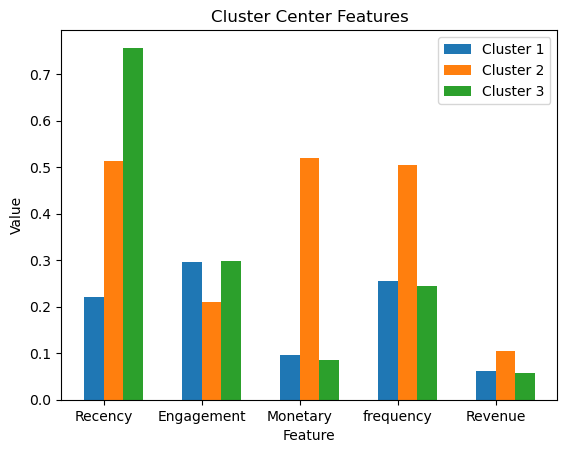

In [41]:
import numpy as np


centers = cluster_features_means

# "Reverse normalize" the data to plot it on the original scale
centers_original = centers #scaler.inverse_transform(centers)

# Create bar charts for each feature of the clustering centers
# Assuming there are four features in 'centers'
n_features = centers_original.shape[1]
x = np.arange(1, n_features + 1)

# Create a bar chart
fig, ax = plt.subplots()

for i, center in enumerate(centers_original):
    ax.bar(x + i*0.2, center, width=0.2, label=f'Cluster {i+1}')

# Add some text labels
ax.set_xlabel('Feature')
ax.set_ylabel('Value')
ax.set_title('Cluster Center Features')
ax.set_xticks(x + 0.2 / 2)
ax.set_xticklabels(['Recency','Engagement','Monetary','frequency','Revenue'])
plt.legend()
plt.show()

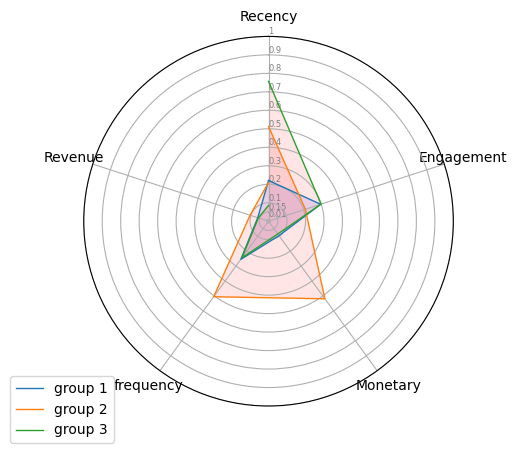

In [42]:
# ---------- Step 1

# number of variable

from cmath import pi


categories = list(['Recency','Engagement','Monetary','frequency','Revenue'])[:]
# Number of variable categories
N = len(categories)

# Set the angle values for each point
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)

# the first axis to be on top:
# Configure the angle offset
ax.set_theta_offset(pi / 2)
# Set clockwise or counterclockwise, 1 or -1
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels labels yet

plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.01,0.05,0.10,0.20,0.30,0.40,0.50,0.6,0.7,0.8,0.9,1], ["0.01","0.15","0.1","0.2", "0.3","0.4","0.5","0.6","0.7","0.8","0.9","1"], color="grey", size=6)
plt.ylim(0, 1)

# ---------- Step 2

# Plot each group of data separately
# Ind1
values = cluster_features_means[0]
values = np.append(values, values[0])  # Close the loop
# print(values,angles)
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group 1")
ax.fill(angles, values, 'b', alpha=0.1)



# # Ind2
values = cluster_features_means[1]
values = np.append(values, values[1]) 
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group 2")
ax.fill(angles, values, 'r', alpha=0.1)
values = cluster_features_means[2]
values = np.append(values, values[2]) 
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group 3")
ax.fill(angles, values, 'r', alpha=0.1)


# # Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))



## Result Analysis: We can categorize our customers into 3 types, high value customers, medium value customers and low value customers.
### High-value customers are usually regular customers with high income and they buy frequently.
### Medium-value customers are usually middle-income earners who are not active on a regular basis.
### Low-value customers have a low income and wait for promotions before they buy something

In [43]:
df['labels']=show_chart["label"]

In [44]:
g1 = df[df['labels']==0]
g1

,Education_Level,Income,Number_of_Kids_at_Home,Number_of_Teenagers_at_Home,Recency_Score,Spending_on_Wines,Spending_on_Fruits,Spending_on_Meat,Spending_on_Fish,Spending_on_Sweets,...,Total_Amount_Spent,Customer_Lifetime_Value,Living_With,Number_of_Children,Family_Size,Re,Engagement,Mon,frequency,labels
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,27,86.447368,Alone,2,3,38,5,27,6,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,53,138.178571,Partner,1,3,26,6,53,8,0
5,Postgraduate,62513.0,0,1,16,520,42,98,0,42,...,716,888.911565,Partner,1,3,16,6,716,22,0
6,Graduate,55635.0,0,1,34,235,65,164,50,49,...,590,362.542088,Alone,1,2,34,6,590,21,0
7,Postgraduate,33454.0,1,0,32,76,10,56,3,1,...,169,147.571770,Partner,1,3,32,8,169,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227,Graduate,57967.0,0,1,39,229,7,137,4,0,...,468,352.933884,Alone,1,2,39,5,468,19,0
2229,Graduate,24434.0,2,0,9,3,2,8,20,0,...,50,424.418605,Partner,2,4,9,7,50,7,0
2233,Graduate,666666.0,1,0,23,9,14,18,8,1,...,62,57.582697,Partner,1,3,23,6,62,11,0
2238,Postgraduate,69245.0,0,1,8,428,30,214,80,30,...,843,1959.840764,Partner,1,3,8,3,843,23,0


In [45]:
g2 = df[df['labels']==1]
g2

,Education_Level,Income,Number_of_Kids_at_Home,Number_of_Teenagers_at_Home,Recency_Score,Spending_on_Wines,Spending_on_Fruits,Spending_on_Meat,Spending_on_Fish,Spending_on_Sweets,...,Total_Amount_Spent,Customer_Lifetime_Value,Living_With,Number_of_Children,Family_Size,Re,Engagement,Mon,frequency,labels
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,1617,888.862952,Alone,0,1,58,7,1617,25,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,776,904.920128,Partner,0,2,26,4,776,21,1
12,Graduate,63033.0,0,0,82,194,61,480,225,112,...,1102,1771.938326,Alone,0,1,82,2,1102,16,1
15,Postgraduate,82800.0,0,0,23,1006,22,115,59,68,...,1315,823.284734,Alone,0,1,23,5,1315,26,1
18,Postgraduate,76995.0,0,1,91,1012,80,498,0,16,...,1782,1417.058824,Partner,1,3,91,6,1782,26,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,Graduate,58554.0,1,1,55,368,24,68,38,0,...,586,333.161994,Partner,2,4,55,7,586,22,1
2228,Undergraduate,7500.0,0,0,53,32,2,1607,12,4,...,1679,892.045124,Partner,0,2,53,1,1679,1,1
2231,Postgraduate,44802.0,0,0,71,853,10,143,13,10,...,1049,564.727139,Alone,0,1,71,8,1049,27,1
2235,Graduate,61223.0,0,1,46,709,43,182,42,118,...,1341,1281.321990,Partner,1,3,46,5,1341,18,1


In [46]:
g3 = df[df['labels']==2]
g3

,Education_Level,Income,Number_of_Kids_at_Home,Number_of_Teenagers_at_Home,Recency_Score,Spending_on_Wines,Spending_on_Fruits,Spending_on_Meat,Spending_on_Fish,Spending_on_Sweets,...,Total_Amount_Spent,Customer_Lifetime_Value,Living_With,Number_of_Children,Family_Size,Re,Engagement,Mon,frequency,labels
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,422,950.802469,Partner,1,3,94,5,422,19,2
9,Postgraduate,5648.0,1,1,68,28,0,6,1,1,...,49,164.082569,Partner,2,4,68,21,49,2,2
11,Undergraduate,7500.0,0,0,59,6,16,11,11,1,...,61,37.483165,Partner,0,2,59,8,61,6,2
13,Postgraduate,59354.0,1,1,53,233,2,53,3,5,...,310,498.458150,Alone,2,3,53,6,310,15,2
16,Graduate,41850.0,1,1,51,53,5,19,2,13,...,96,63.363472,Partner,2,4,51,8,96,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226,Graduate,63777.0,1,1,87,457,5,106,15,17,...,653,514.784017,Partner,2,4,87,8,653,26,2
2230,Graduate,11012.0,1,0,82,24,3,26,7,1,...,84,65.095541,Alone,1,2,82,10,84,9,2
2232,Graduate,26816.0,0,0,50,5,1,6,3,4,...,22,11.774194,Alone,0,1,50,4,22,4,2
2234,Graduate,34421.0,1,0,81,3,3,7,6,2,...,30,30.082418,Partner,1,3,81,7,30,4,2


In [47]:
g1.describe()

,Income,Number_of_Kids_at_Home,Number_of_Teenagers_at_Home,Recency_Score,Spending_on_Wines,Spending_on_Fruits,Spending_on_Meat,Spending_on_Fish,Spending_on_Sweets,Spending_on_Gold,...,Customer_Duration,Total_Amount_Spent,Customer_Lifetime_Value,Number_of_Children,Family_Size,Re,Engagement,Mon,frequency,labels
count,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,...,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.0
mean,42474.777476,0.605156,0.540027,21.800543,125.272727,11.393487,56.930801,16.493894,11.139756,26.937585,...,330.426052,248.168250,937.966680,1.145183,2.799186,21.800543,6.232022,248.168250,11.222524,0.0
std,29204.136621,0.541862,0.535517,14.002702,159.382522,22.510260,80.854400,29.782505,22.712182,36.593707,...,203.006439,269.009655,5008.618642,0.693002,0.827745,14.002702,2.149736,269.009655,6.083377,0.0
min,4023.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,6.000000,8.902439,0.000000,1.000000,0.000000,0.000000,6.000000,0.000000,0.0
25%,30081.000000,0.000000,0.000000,10.000000,11.000000,1.000000,9.000000,2.000000,1.000000,6.000000,...,150.000000,48.000000,66.363636,1.000000,2.000000,10.000000,5.000000,48.000000,6.000000,0.0
50%,40211.000000,1.000000,1.000000,22.000000,48.000000,4.000000,23.000000,6.000000,3.000000,15.000000,...,324.000000,117.000000,203.442623,1.000000,3.000000,22.000000,7.000000,117.000000,9.000000,0.0
75%,53034.000000,1.000000,1.000000,33.000000,187.000000,11.000000,70.000000,16.000000,11.000000,32.000000,...,501.000000,400.000000,469.285714,2.000000,3.000000,33.000000,8.000000,400.000000,16.000000,0.0
max,666666.000000,2.000000,2.000000,48.000000,964.000000,194.000000,559.000000,240.000000,262.000000,321.000000,...,697.000000,1196.000000,79643.000000,3.000000,5.000000,48.000000,19.000000,1196.000000,31.000000,0.0


In [48]:
g2.describe()

,Income,Number_of_Kids_at_Home,Number_of_Teenagers_at_Home,Recency_Score,Spending_on_Wines,Spending_on_Fruits,Spending_on_Meat,Spending_on_Fish,Spending_on_Sweets,Spending_on_Gold,...,Customer_Duration,Total_Amount_Spent,Customer_Lifetime_Value,Number_of_Children,Family_Size,Re,Engagement,Mon,frequency,labels
count,772.000000,772.000000,772.00000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,...,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.0
mean,71592.708549,0.098446,0.42228,50.735751,658.040155,56.148964,383.113990,80.198187,58.024611,76.841969,...,388.492228,1312.367876,3788.306566,0.520725,2.147668,50.735751,4.396373,1312.367876,22.227979,1.0
std,13778.718287,0.302429,0.52971,26.174811,304.702700,49.423497,255.869723,66.579703,50.804839,60.588390,...,200.385403,408.175990,15201.482143,0.644913,0.836246,26.174811,2.363994,408.175990,4.738817,0.0
min,2447.000000,0.000000,0.00000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,415.000000,301.143141,0.000000,1.000000,0.000000,0.000000,415.000000,1.000000,1.0
25%,63851.500000,0.000000,0.00000,29.000000,420.750000,19.000000,178.750000,27.000000,17.750000,31.000000,...,221.500000,995.000000,819.397201,0.000000,2.000000,29.000000,2.000000,995.000000,19.000000,1.0
50%,71952.000000,0.000000,0.00000,53.000000,616.500000,41.500000,335.000000,62.000000,43.000000,57.000000,...,413.000000,1250.000000,1192.456623,0.000000,2.000000,53.000000,4.000000,1250.000000,22.000000,1.0
75%,80124.000000,0.000000,1.00000,72.000000,873.000000,84.000000,536.000000,123.000000,91.000000,111.000000,...,565.500000,1596.250000,2171.612233,1.000000,3.000000,72.000000,6.000000,1596.250000,25.000000,1.0
max,160803.000000,2.000000,2.00000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,...,698.000000,2525.000000,195275.000000,3.000000,5.000000,99.000000,11.000000,2525.000000,44.000000,1.0


In [49]:
g3.describe()

,Income,Number_of_Kids_at_Home,Number_of_Teenagers_at_Home,Recency_Score,Spending_on_Wines,Spending_on_Fruits,Spending_on_Meat,Spending_on_Fish,Spending_on_Sweets,Spending_on_Gold,...,Customer_Duration,Total_Amount_Spent,Customer_Lifetime_Value,Number_of_Children,Family_Size,Re,Engagement,Mon,frequency,labels
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,...,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.0
mean,40200.310534,0.647059,0.560876,74.924761,110.099863,9.812585,49.584131,13.663475,10.418605,26.585499,...,340.060192,220.164159,677.374835,1.207934,2.861833,74.924761,6.277702,220.164159,10.752394,2.0
std,17048.504077,0.550145,0.558914,15.113582,146.198438,17.956848,71.381702,25.193422,20.815099,37.168727,...,198.316888,239.844505,5297.936310,0.714233,0.876673,15.113582,2.199199,239.844505,5.663895,0.0
min,1730.000000,0.000000,0.000000,48.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,5.000000,4.119639,0.000000,1.000000,48.000000,0.000000,5.000000,0.000000,2.0
25%,28441.000000,0.000000,0.000000,62.500000,12.000000,1.000000,11.000000,2.000000,1.000000,5.000000,...,176.000000,47.000000,59.978078,1.000000,2.000000,62.500000,5.000000,47.000000,6.000000,2.0
50%,38946.000000,1.000000,1.000000,76.000000,39.000000,3.000000,23.000000,6.000000,4.000000,13.000000,...,331.000000,102.000000,157.768692,1.000000,3.000000,76.000000,7.000000,102.000000,9.000000,2.0
75%,50616.000000,1.000000,1.000000,87.500000,162.000000,10.000000,64.500000,15.000000,11.000000,32.000000,...,505.500000,321.000000,423.273166,2.000000,3.000000,87.500000,8.000000,321.000000,15.000000,2.0
max,156924.000000,2.000000,2.000000,99.000000,741.000000,178.000000,818.000000,208.000000,195.000000,291.000000,...,699.000000,1092.000000,139977.500000,3.000000,5.000000,99.000000,21.000000,1092.000000,27.000000,2.0


In [50]:
g1[['Number_of_Web_Visits_Per_Month',
       'Accepted_Campaign_3', 'Accepted_Campaign_4', 'Accepted_Campaign_5',
       'Accepted_Campaign_1', 'Accepted_Campaign_2', 'Complaint_Flag']].describe()

,Number_of_Web_Visits_Per_Month,Accepted_Campaign_3,Accepted_Campaign_4,Accepted_Campaign_5,Accepted_Campaign_1,Accepted_Campaign_2,Complaint_Flag
count,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000
mean,6.081411,0.088195,0.035278,0.006784,0.014925,0.005427,0.012212
std,2.071781,0.283771,0.184607,0.082142,0.121337,0.073521,0.109904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
g2[['Number_of_Web_Visits_Per_Month',
       'Accepted_Campaign_3', 'Accepted_Campaign_4', 'Accepted_Campaign_5',
       'Accepted_Campaign_1', 'Accepted_Campaign_2', 'Complaint_Flag']].describe()

,Number_of_Web_Visits_Per_Month,Accepted_Campaign_3,Accepted_Campaign_4,Accepted_Campaign_5,Accepted_Campaign_1,Accepted_Campaign_2,Complaint_Flag
count,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000
mean,3.788860,0.076425,0.145078,0.198187,0.156736,0.031088,0.007772
std,2.238846,0.265849,0.352407,0.398892,0.363787,0.173668,0.087873
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
g3[['Number_of_Web_Visits_Per_Month',
       'Accepted_Campaign_3', 'Accepted_Campaign_4', 'Accepted_Campaign_5',
       'Accepted_Campaign_1', 'Accepted_Campaign_2', 'Complaint_Flag']].describe()

,Number_of_Web_Visits_Per_Month,Accepted_Campaign_3,Accepted_Campaign_4,Accepted_Campaign_5,Accepted_Campaign_1,Accepted_Campaign_2,Complaint_Flag
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,6.158687,0.053352,0.039672,0.006840,0.016416,0.002736,0.008208
std,2.161174,0.224887,0.195320,0.082477,0.127155,0.052271,0.090287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Result##
**For groups g0, g1 and g2**, we can see that their consumption mainly focuses on wine and meat, so our promotions should be focused on wine and meat.
\
**For group g1**, they prefer campaigns 3 and 4, so we should push campaigns 3 and 4 to them more.
\
**For the g3 group** they prefer campaigns 5 and 1, so give them campaigns 5 and 1.
\
**For g2 group** they prefer activities 3 and 4, so push activities 3 and 4 more 
\
Also, we can see that the g2 group spend the least amount of money and complain the most.